# Simple predictions with a trained model

In [1]:
# This needs to be imported because the model uses a custom classes that need to be registered
from src.sketch_detection_rcnn.roi_heads import SketchROIHeads  # noqa # pylint: disable=unused-import

In [2]:
import os
from src.utils.utils_json import read_json

model_name = 'amazing_ramanujan'

filename = os.path.join("reports", f"{model_name}.json")
model_meta = read_json(filename)

if "model_name" not in model_meta:
    model_meta["model_name"] = model_meta


In [3]:
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

cfg = get_cfg()
cfg.merge_from_file(model_meta["config_file"])

# path to the model we just trained
cfg.MODEL.WEIGHTS = os.path.join("models", model_name, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [4]:
def count_classes(classes: list[int]) -> dict[int, int]:
    class_count = {}
    for key in classes:
        if key in class_count:
            class_count[key] += 1
        else:
            class_count[key] = 1

    return class_count

/home/jupyter-patrickzierahn/.local/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Predictions


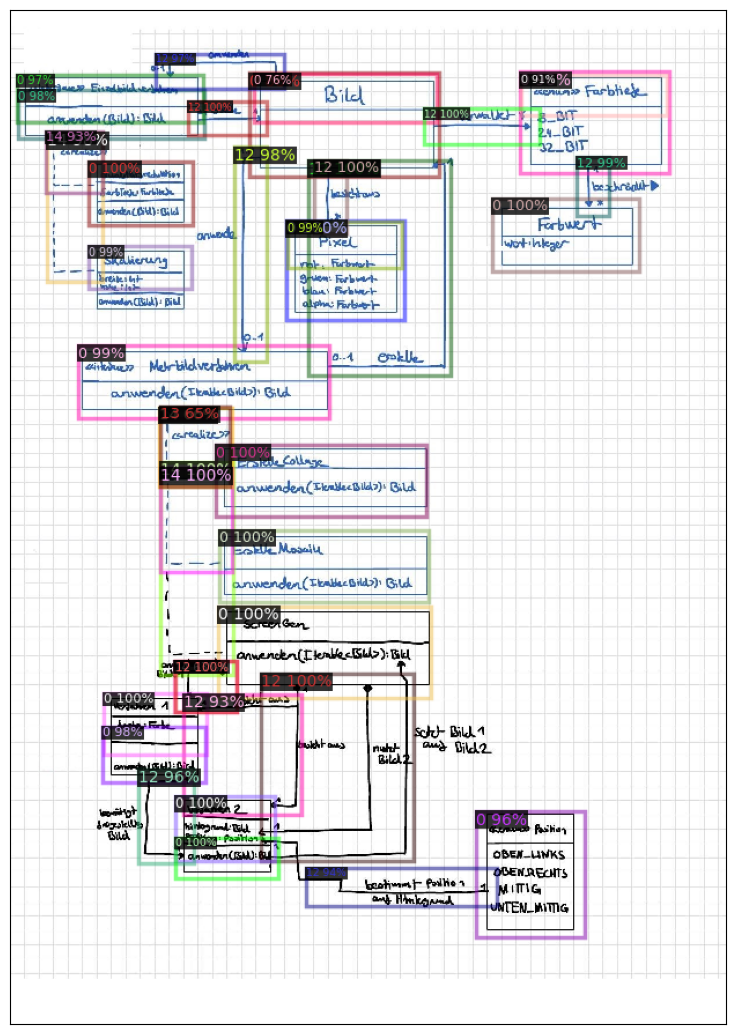

In [5]:
import cv2
from detectron2.utils.visualizer import Visualizer
from src.visualization.visualize import show_img

im = cv2.imread("./data/test.jpg")
outputs = predictor(im)

# remove the colors of unsegmented pixels. This option is only available for segmentation models
visualizer = Visualizer(im, scale=0.5)

print("Predictions")
pred_out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
show_img(pred_out.get_image())